# Application of Artificial Intelligence in Education: Predicting Academic Achievement in Secondary Schools

![Imagen cabecera](../img/cabecera.jpg)

## Introduction
Nowadays, the analysis of educational data has become very important to understand the factors that influence students' academic performance. Thanks to advances in machine learning, it is possible to develop predictive models to identify patterns and generate strategies to improve school results.

This study focuses on the construction and evaluation of a machine learning model capable of predicting the grade classification of secondary school students, using a detailed dataset of 2392 students. The dataset includes demographic variables, study habits, parental involvement and extracurricular activities, providing a solid basis for analysis.

The main objective of this work is to design a model that not only achieves an accurate prediction of the target variable (GradeClass), but also provides interpretability on the most influential factors in academic performance. To this end, different classification algorithms will be explored, evaluating their performance through key metrics and comparing their results to determine the most appropriate one.

Through this research, it is hoped that the findings will contribute to informed educational decision-making, facilitating the implementation of early intervention strategies and personalisation of learning based on individual student characteristics.

## Objective of the work
The main objective of this project is to apply machine learning techniques to predict the academic performance of secondary school students, classified according to their performance in different grading categories. Through the analysis of a comprehensive dataset, the aim is to identify patterns that can help improve educational strategies and personalise student learning.

## Approach and Methodology
To achieve the stated objectives, two main approaches will be employed: linear models and decision trees. Linear models, such as logistic regression, will be used to explore linear relationships between predictor variables and academic performance ranking. Decision trees, on the other hand, will allow a more detailed interpretation of how different factors affect the ranking of students, as they provide a hierarchical structure that facilitates the visualisation of patterns in the data.

Both approaches will be evaluated in terms of precision, accuracy, and other key performance metrics to determine which model is best suited for predicting academic performance. In addition, special emphasis will be placed on the interpretability of the models, so that the results are understandable and useful in an educational context.

## List of Variables

### Predictor Variables (Features)

- **StudentID**: Unique identifier assigned to each student (1001 to 3392).
    - Type: Categorical.
- **Age**: Age of students (15 to 18 years).
    - Type: Categorical
- **Gender**: Gender of the students.  
    - Type: Binary.
- **Ethnicity**: Students' ethnicity.  
    - Type: Categorical.
- **ParentalEducation**: Parents' level of education. 
    - Type: Categorical.
- **StudyTimeWeekly**: Weekly study time in hours (0 to 20 hours).
    - Type: Numerical
- **Absences**: Number of absences during the school year (0 to 30).
    - Type: Numeric
- **Tutoring**: Tutoring status.  
    - Type: Binary.
- **ParentalSupport**: Level of parental support.  
    - Type: Categorical.
- **Extracurricular**: Participation in extracurricular activities.  
    - Type: Binary.
- **Sports**: Participation in sports.  
    - Type: Binary.
- **Music**: Participation in music activities. 
    - Type: Binary.
- **Volunteering**: Participation in volunteering.  
    - Type: Binary.
- **GPA**: Grade point average on a scale of 2.0 to 4.0.
    - Type: Numeric

### Target

- **GradeClass**: Classification of students' grades according to GPA.
    - Type: Categorical.

NOTE: The GPA (Grade Point Average) system is a grading system used mainly in countries such as the USA, which reflects the weighted average of the grades obtained by a student in different subjects. It is a numerical value on a scale generally from 0.0 to 4.0, where:

- 4.0 is the highest grade (A, excellent).

- 0.0 is the lowest grade (F, fail).


However, in this dataset the grading of grades is as follows:
- 0: A (Outstanding)
- 1: B ( Notable)
- 2: C (Good)
- 3: D (Sufficient)
- 4: F (Fail)

0 being the best grade and 4 the worst grade.

### 0. Import libraries

Before starting the analysis, we will import the necessary libraries for data manipulation, prediction and visualisation.

In [48]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as stats
import seaborn as sns


from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report

import lightgbm as lgb
from xgboost import XGBClassifier


### 1. Loading and browsing data

Next, we load the dataset from a CSV file.  
For this, we use the **pandas** library, which allows us to read and manipulate data efficiently.

In addition, before performing the analysis we will check the data type of each column and if there are null or duplicate values.

In [ ]:
# Data loading
df = pd.read_csv('../data/Student_performance_data _.csv')

In [ ]:
# Set column ‘StudentID’ as index
df = df.set_index('StudentID')

In [51]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 280.3 KB


In [ ]:
# Checking for null values
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

As can be seen above, the present dataset has no null or duplicate values, therefore no further imputation is necessary.

Before proceeding further, we should analyse the variable ‘GPA’ as it is likely to produce data leakage as it has a direct relationship with the target variable.

In [55]:
# Calcular la correlación de Pearson
correlation = df[['GPA', 'GradeClass']].corr()
print(correlation)

                 GPA  GradeClass
GPA         1.000000   -0.782835
GradeClass -0.782835    1.000000


By obtaining an absolute correlation of 0.78, we can say that there is a very strong correlation between the variable ‘GPA’ and the target but it is not 100% confirmed, so, in order to verify it, a simple model will be trained only with this variable.

In [56]:
# Usar solo GPA como predictor
X = df[['GPA']]
y = df[['GradeClass']]

# Split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo simple
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar precisión
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo solo con GPA: {accuracy:.4f}")

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precisión del modelo solo con GPA: 0.8852


Finally, we have obtained an accuracy of approximately 90%, so we will proceed to remove that column from the data.

In [ ]:
# Create a copy
df_2 = df.copy()

In [ ]:
# Remove the ‘GPA’ column
df_2 = df_2.drop(columns=['GPA'])

In [ ]:
# Visualise the first data
df_2.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
StudentID,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


### 2. Separation into Train and Test

Next, the dataset will be divided into train and test for a subsequent analysis of the target and the characteristics.

In [60]:
train_set, test_set = train_test_split(df_2, test_size = 0.2, stratify = df_2['GradeClass'], random_state= 42)

### 3. Exploratory data analysis (MiniEDA)

In this section we will try to analyse the distribution of the target and the characteristics, as well as the possible relationship between them.

To do this, we will first establish a series of lists corresponding to whether the characteristics are numerical, categorical or binary variables. We will also identify the target variable.

In [ ]:
# Target variable
target = 'GradeClass'

# Numerical variables
numerical_cols = ['StudyTimeWeekly', 'Absences']

# Binary variables
binary_cols = [col for col in train_set.columns if train_set[col].nunique() == 2]

# Categorical variables
categorical_cols = [col for col in train_set.columns if col not in numerical_cols and col not in binary_cols and col not in target]

In [62]:
print(f'Target:{target}')
print(f'Columnas numéricas:{numerical_cols}')
print(f'Columnas binarias:{binary_cols}')
print(f'Columnas categóricas:{categorical_cols}')

Target:GradeClass
Columnas numéricas:['StudyTimeWeekly', 'Absences']
Columnas binarias:['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
Columnas categóricas:['Age', 'Ethnicity', 'ParentalEducation', 'ParentalSupport']


#### A. Target analysis

It is important to know the distribution of the target as this will be necessary in order to choose the right metrics to evaluate the model.


In [63]:
train_set[target].value_counts(True)

GradeClass
4.0    0.506012
3.0    0.173027
2.0    0.163617
1.0    0.112389
0.0    0.044956
Name: proportion, dtype: float64

In [ ]:
# Check that the test distribution is equal
test_set[target].value_counts(True)

GradeClass
4.0    0.507307
3.0    0.173278
2.0    0.162839
1.0    0.112735
0.0    0.043841
Name: proportion, dtype: float64

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\1835751789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=train_set, palette='Set2')


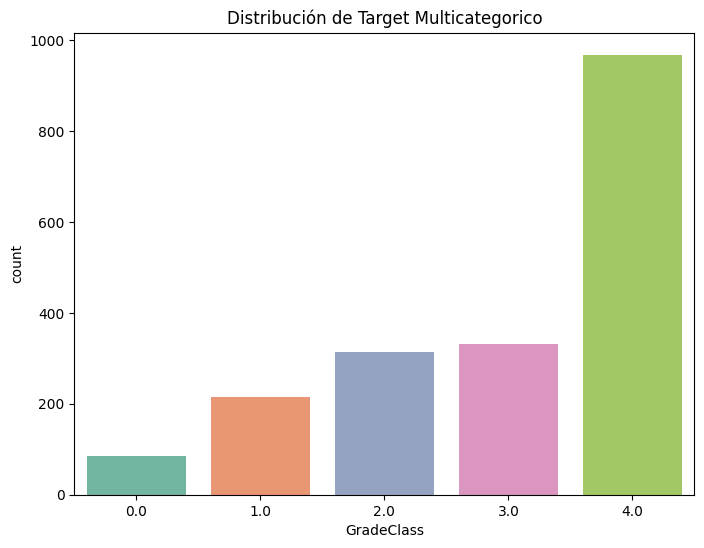

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x=target, data=train_set, palette='Set2')
plt.title('Distribución de Target Multicategorico')
plt.show();

The result obtained is quite unbalanced so we will have to use ‘Balance Accuracy’ to avoid that the model only predicts the majority class which is the F class corresponding to the failures.

#### B. Analysis of numerical variables

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


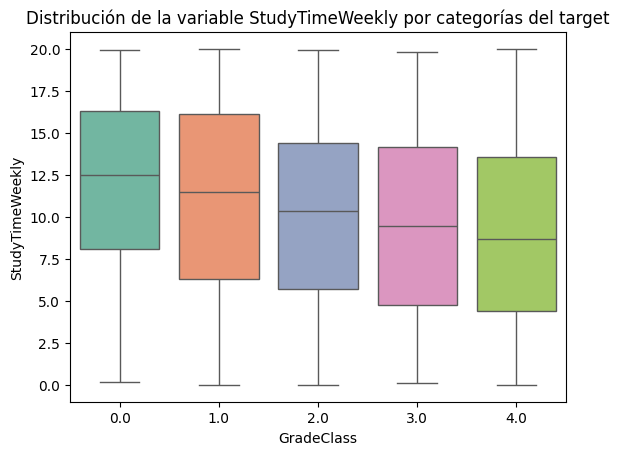

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


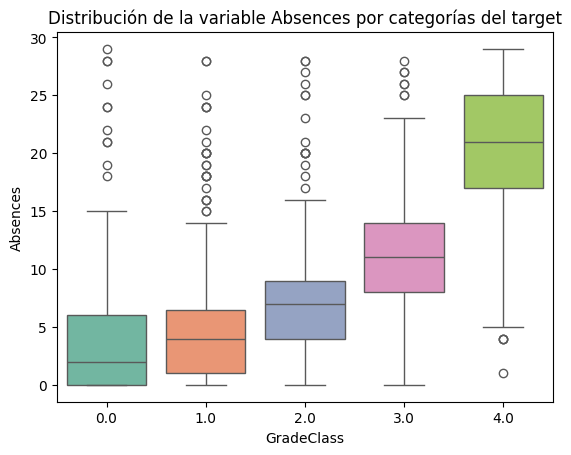

In [66]:
for col in numerical_cols:
    sns.boxplot(x=target, y= col, data=train_set, palette='Set2')
    plt.title(f'Distribución de la variable {col} por categorías del target')
    plt.show();

**Conclusions:**
- Study: although the difference in study averages is not very drastic, those who have achieved A's spend on average 12.5 hours studying while those who fail spend just over half as much.
- Absences: there is a clear difference in absences between students who pass and those who fail, with the latter having a higher average number of absences of around 22, while students with an A do not reach 5 absences. In addition, class 1, corresponding to the students with a B, are those with the most *outliers*.

array([[<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>]], dtype=object)

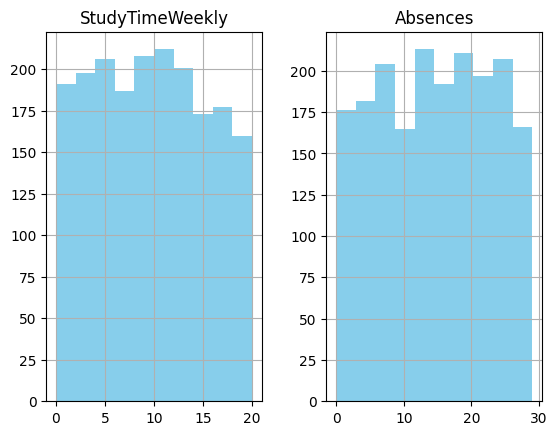

In [67]:
train_set[numerical_cols].hist(color='skyblue')

On the other hand, it can be seen that none of the numerical columns have a normal distribution, so they will have to be normalised later.

In [ ]:
# Apply ANOVA for each numerical variable
for col in numerical_cols:  
    groups = [train_set[train_set[target] == category][col] for category in train_set[target].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: StudyTimeWeekly - p-value: 5.581043146527924e-09
Variable: Absences - p-value: 0.0


In addition, both variables have a p-value of less than 0.05, so they are key in determining the target.

#### C. Analysis of binary variables

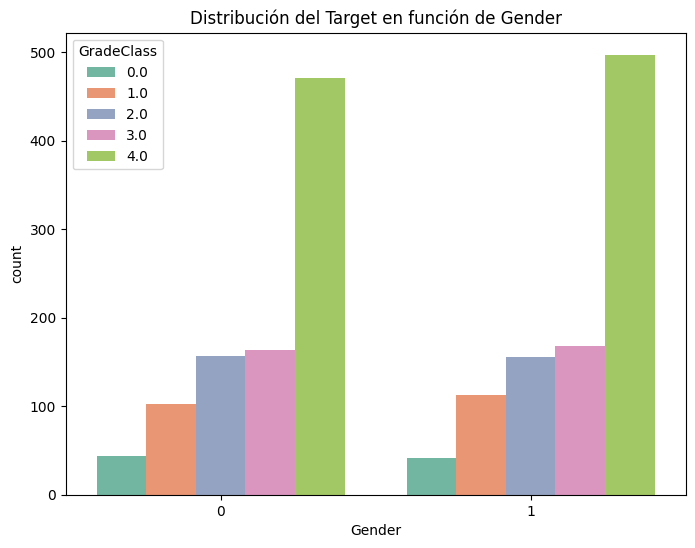

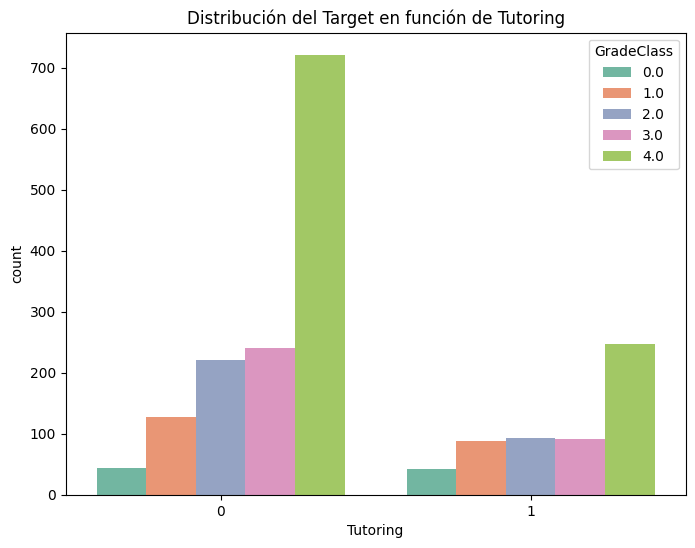

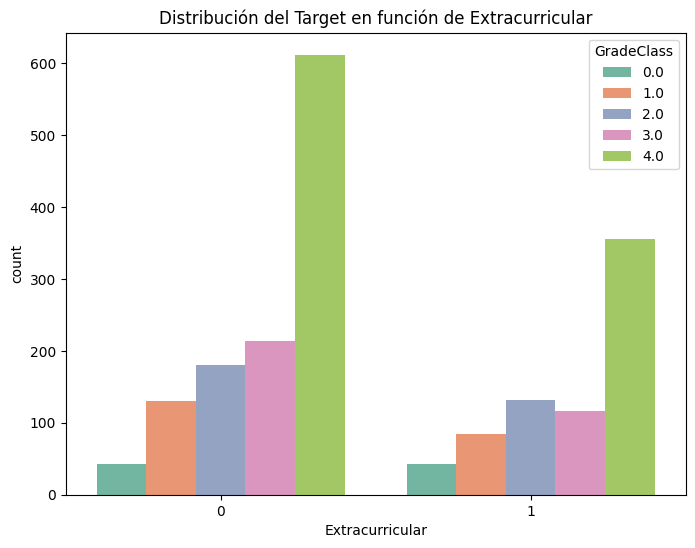

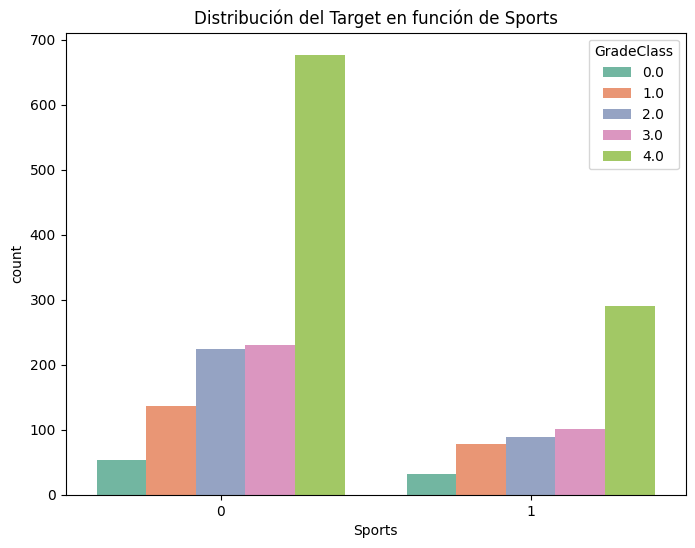

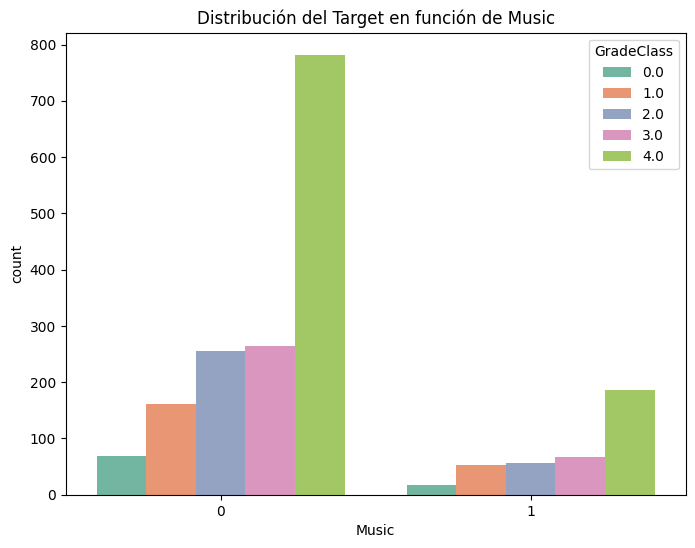

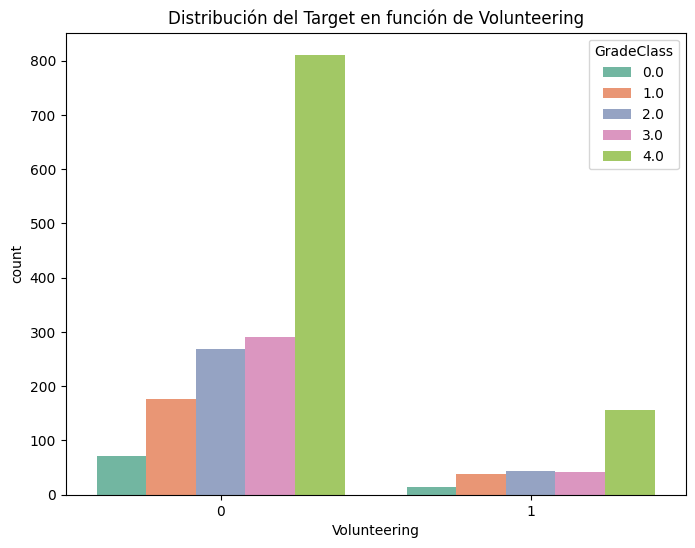

In [69]:
for feature in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue= target, data=train_set, palette='Set2')
    plt.title(f'Distribución del Target en función de {feature}')
    plt.xlabel(feature)

**Conclusions:**
- Gender: both males and females have a similar distribution of grades, so academic performance is not as strongly influenced by gender.
- Tutoring: students who attend tutoring have a better distribution of grades compared to those who do not, suggesting that tutoring may be beneficial in improving academic performance.
- Extracurricular: those students who attend extracurricular activities perform close to average.
- Sports: there is a more even distribution in grades for those who do sport.
- Music: as in Sports, the distribution of marks is much more even for those who attend music activities, but in the case of failures they are much lower.
- Volunteering: The distribution of marks is also very even except for failing marks.

In [ ]:
for col in binary_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Gender - p-value: 0.9639999413566478
Variable: Tutoring - p-value: 1.715712262561676e-07
Variable: Extracurricular - p-value: 0.054548054224185516
Variable: Sports - p-value: 0.21860896941845034
Variable: Music - p-value: 0.41024391035976404
Variable: Volunteering - p-value: 0.33993342442197544


The variables ‘Tutoring’ and ‘Extracurricular’ are strongly correlated with the target, so they will be decisive in predicting it.

#### D. Analysis of categorical variables

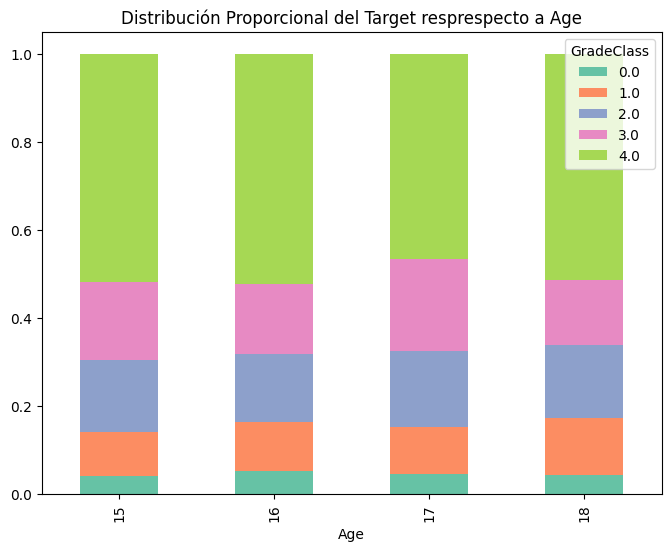

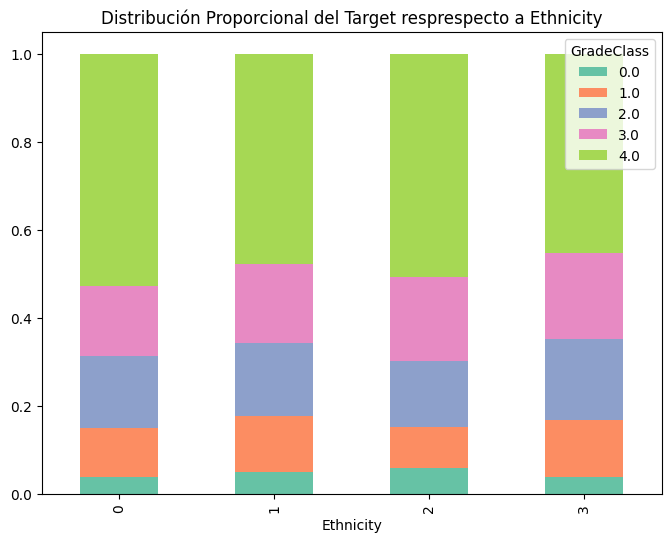

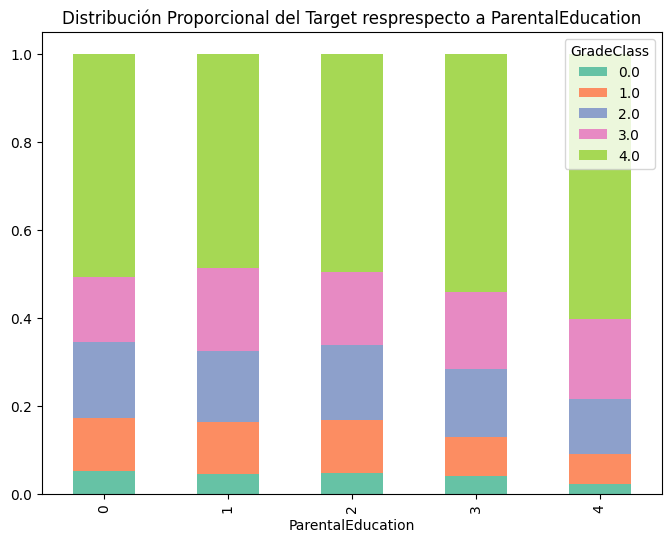

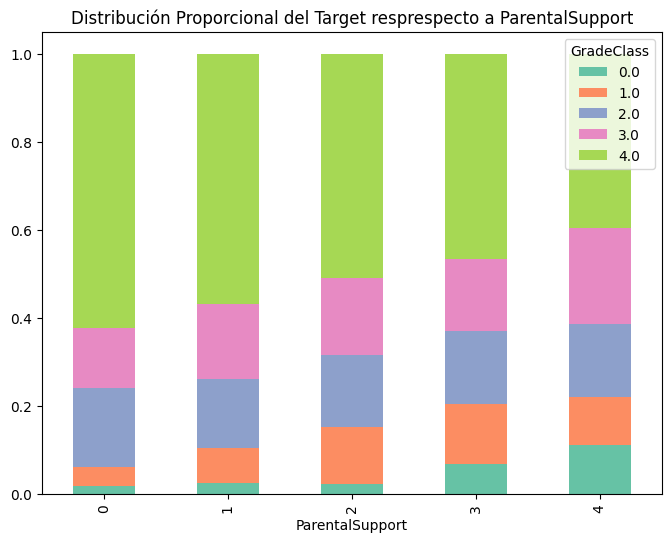

In [ ]:
for col in categorical_cols:

    # Calculate the proportions
    proporciones = train_set.groupby(col)[target].value_counts(normalize=True).unstack().fillna(0)

    # Graph the proportions
    proporciones.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('Set2'))

    plt.title(f'Distribución Proporcional del Target resprespecto a {col}')
    plt.xlabel(col)
    plt.show()

**Conclusions:**
- Age: the distribution of marks is fairly uniform across all ages, although it is observed that the number of A's is decreasing.
- Ethnicity: this variable does not appear to show notable disruptions in the grades, although we could point out that Asian students show more A's while Caucasians are the ones who fail the most.
- ParentalEducation: there is a clear difference for students whose parents have more than a Bachelor's degree, as they do not have A's and are the ones with the highest number of failures.
- ParentalSupport: those students whose parents dedicate more time to them have better grades than those whose parents do not dedicate any time to them. In addition, as more time is dedicated to the children, it can be seen that the number of failures decreases.

In [72]:
for col in categorical_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Tabla de contingencia
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Age - p-value: 0.49659814208427744
Variable: Ethnicity - p-value: 0.5451489898003012
Variable: ParentalEducation - p-value: 0.8002249519233711
Variable: ParentalSupport - p-value: 4.2124744901085716e-09


The variable ‘ParentalSupport’ has a very low p-value, so it has a significant relationship with the target.

#### Correlation between numerical variables

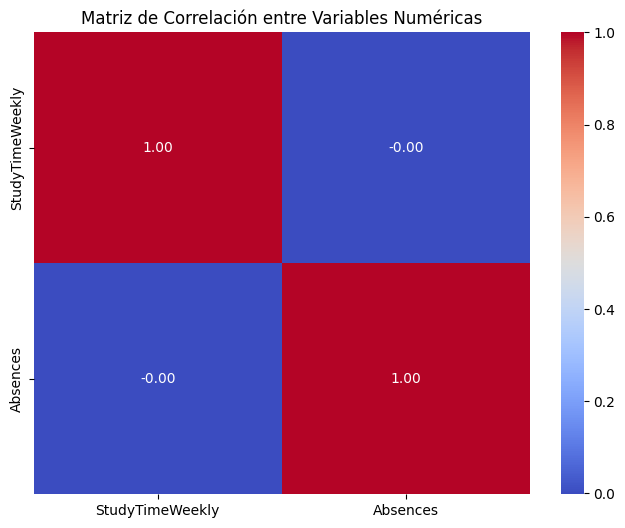

In [73]:
correlation_matrix = train_set[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

There is no correlation between the numerical variables.

#### Correlation between binary and categorical variables

In [74]:
cat_col = categorical_cols + binary_cols

In [75]:
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

for col in cat_col:
    contingency_table = pd.crosstab(train_set[col], train_set[target])
    print(f"Variable: {col} - Cramér's V: {cramers_v(contingency_table)}")

Variable: Age - Cramér's V: 0.04453155801599096
Variable: Ethnicity - Cramér's V: 0.04340326961505698
Variable: ParentalEducation - Cramér's V: 0.038169949809869104
Variable: ParentalSupport - Cramér's V: 0.09708987687198888
Variable: Gender - Cramér's V: 0.017584574581708878
Variable: Tutoring - Cramér's V: 0.1392659030657234
Variable: Extracurricular - Cramér's V: 0.06963609627412637
Variable: Sports - Cramér's V: 0.054824931825447516
Variable: Music - Cramér's V: 0.04554833120658262
Variable: Volunteering - Cramér's V: 0.048619809155890925


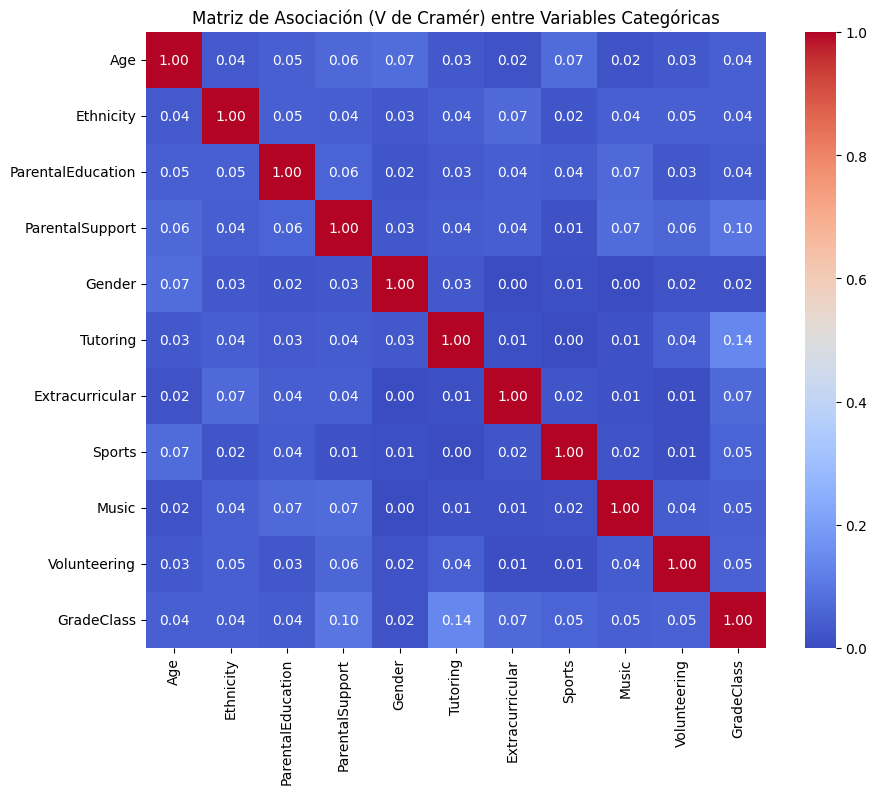

In [76]:
categorical_vars = cat_col + [target] 
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for col1 in categorical_vars:
    for col2 in categorical_vars:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            contingency_table = pd.crosstab(train_set[col1], train_set[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(contingency_table)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Asociación (V de Cramér) entre Variables Categóricas')
plt.show()

There is hardly any correlation between binary and categorical variables.

### 4. Pre-processing of variables

After the analysis of our characteristics, despite the existence of variables with a greater relationship with the target, it was determined when performing ‘feature selection’ in previous versions that the best model is obtained by incorporating all the features. Thus, we will proceed to standardise the numerical variables, and convert the ‘Age’ column with a one-hot-encoder.

In [77]:
train_set

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
StudentID,,,,,,,,,,,,,
1654,15,0,2,3,1.901131,7,0,2,0,0,0,0,3.0
1201,17,0,1,2,10.546218,18,0,1,0,0,1,0,4.0
2607,16,1,1,0,6.177218,27,0,1,0,1,0,0,4.0
2033,15,0,2,1,6.108270,24,1,3,1,0,1,0,4.0
2294,15,1,1,2,0.305297,23,0,0,1,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,17,1,3,1,8.348966,8,0,3,0,1,0,0,3.0
3116,16,1,0,2,10.976835,1,0,0,0,0,0,0,2.0
1720,18,0,0,2,16.975352,27,1,0,1,0,0,1,4.0


In [ ]:
# Standardisation of numeric variables and conversion of the variable ‘Age’ with one-hot-encoder
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), ['Age']),  # OneHotEncoder for categoricals with more than 2 classes
    ("scaler", StandardScaler(), numerical_cols)  # Numerical scaling
], remainder='passthrough')  # Maintains columns that do not require transformation

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Adjust pipeline in training dataset
pipeline.fit(train_set)

# Transform both datasets (without re-adjustment)
array_train_transformed = pipeline.transform(train_set)
array_test_transformed = pipeline.transform(test_set)

# Get column names AFTER training on train
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame with correct column names
train_transformed = pd.DataFrame(array_train_transformed, columns=feature_names)
test_transformed = pd.DataFrame(array_test_transformed, columns=feature_names)

train_transformed.head()

,onehot__Age_15,onehot__Age_16,onehot__Age_17,onehot__Age_18,scaler__StudyTimeWeekly,scaler__Absences,remainder__Gender,remainder__Ethnicity,remainder__ParentalEducation,remainder__Tutoring,remainder__ParentalSupport,remainder__Extracurricular,remainder__Sports,remainder__Music,remainder__Volunteering,remainder__GradeClass
0,1.0,0.0,0.0,0.0,-1.384170,-0.902052,0.0,2.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,1.0,0.0,0.152788,0.398611,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0
2,0.0,1.0,0.0,0.0,-0.623951,1.462791,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0
3,1.0,0.0,0.0,0.0,-0.636208,1.108065,0.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,4.0
4,1.0,0.0,0.0,0.0,-1.667884,0.989822,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


In [ ]:
# Check that the numerical columns have been standardised correctly.
num_cols = ['scaler__StudyTimeWeekly', 'scaler__Absences']
train_transformed[num_cols].describe()

,scaler__StudyTimeWeekly,scaler__Absences
count,1.913000e+03,1.913000e+03
mean,-2.270357e-16,3.714285e-17
std,1.000261e+00,1.000261e+00
min,-1.721973e+00,-1.729748e+00
25%,-8.450160e-01,-9.020524e-01
50%,-6.817224e-03,4.388497e-02
75%,8.171388e-01,8.715802e-01
max,1.829624e+00,1.699275e+00


### 5. Separation into X and Y pairs

In [ ]:
# Split data into x and y
X_train = train_transformed.drop('remainder__GradeClass', axis=1)
y_train =train_transformed['remainder__GradeClass']
X_test = test_transformed.drop('remainder__GradeClass', axis = 1)
y_test = test_transformed['remainder__GradeClass']

### 6. Modelling

Before starting with the modelling, it is important to apply the SMOTE technique because the dataset is very unbalanced, which favours the majority class.

In [ ]:
# Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Defining base models without adjusted hyperparameters
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "LightGBM": lgb.LGBMClassifier(),
     "XGBoost": XGBClassifier()
}

In [ ]:
# Evaluating baseline models with Balanced Accuracy
scores = {}

for model_name, model in models.items():
    print(f"Entrenando {model_name}...")

    # Create pipeline for each model without preprocessing, since X_train and X_test are already transformed.
    pipeline_model = Pipeline([
        ("model", model)
    ])

    # Train the model
    pipeline_model.fit(X_train_resampled, y_train_resampled)

    # Predict in test
    y_pred = pipeline_model.predict(X_test)

    # Evaluate using balanced_accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    scores[model_name] = balanced_acc

    print(f"{model_name} - Balanced Accuracy: {balanced_acc:.4f}")

# Show final results in order
print("\nResultados finales de los modelos:")
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

Entrenando RandomForest...
RandomForest - Balanced Accuracy: 0.4885
Entrenando GradientBoosting...
GradientBoosting - Balanced Accuracy: 0.5360
Entrenando LogisticRegression...


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Balanced Accuracy: 0.4811
Entrenando LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3819
[LightGBM] [Info] Number of data points in the train set: 4840, number of used features: 15
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
LightGBM - Balanced Accuracy: 0.5302
Entrenando XGBoost...
XGBoost - Balanced Accuracy: 0.5101

Resultados finales de los modelos:
GradientBoosting: 0.5360
LightGBM: 0.5302
XGBoost: 0.5101
RandomForest: 0.4885
LogisticRegression: 0.4811


In [ ]:
# Selecting the best model based on balanced_accuracy
best_model_name = max(scores, key=scores.get)  # Model with higher balanced_accuracy
print(f"\n Modelo seleccionado para optimización: {best_model_name}")




 Modelo seleccionado para optimización: GradientBoosting


### 7. Optimisation of the best model

In this version, GrisSearch will be used to optimise the model as this method gives better results than other versions where Optuna was used.

In [ ]:
param_grid = {
    "RandomForest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]},
    "GradientBoosting": {"model__n_estimators": [50, 100], "model__learning_rate": [0.01, 0.1]},
    "LightGBM": {"model__num_leaves": [31, 50], "model__learning_rate": [0.01, 0.1]},
    "XGBoost": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [3, 6, 10],
        "model__learning_rate": [0.01, 0.1, 0.2],
        "model__gamma": [0, 0.1, 0.5],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0]
    }
}

# Optimise hyperparameters in the best model
print(f"\n Buscando mejores hiperparámetros para {best_model_name}...")

pipeline = Pipeline([
    ("model", models[best_model_name])  # Only the best model
])

grid_search = GridSearchCV(pipeline, param_grid[best_model_name], cv=5, scoring="balanced_accuracy", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)


 Buscando mejores hiperparámetros para GradientBoosting...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__n_estimators': [50, 100]},
             scoring='balanced_accuracy')

### 8. Evaluation against test

In [ ]:
# Evaluate in test
y_pred = grid_search.best_estimator_.predict(X_test)
best_score = balanced_accuracy_score(y_test, y_pred)

print(f"\n {best_model_name} - Mejor Balanced Accuracy después de ajuste: {best_score:.4f}")

# Saving the best model
best_model = grid_search.best_estimator_


 GradientBoosting - Mejor Balanced Accuracy después de ajuste: 0.5360


### 10. Saving the best model

In [ ]:
# Create the ‘models’ folder
model_path = "../models/best_model_multi.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the best model in the models folder
joblib.dump(best_model, model_path)

print("El modelo ha sido guardado correctamente")

El modelo ha sido guardado correctamente


### 9. Metrics

To evaluate the performance of the model we have used the classification report and the confusion matrix.

The **classification report** provides a detailed view of the model's performance through key metrics such as accuracy, recall and F1-score for each class, allowing us to identify imbalances in the prediction of specific categories.

On the other hand, the **confusion matrix** provides a visual representation of the model's hits and misses when classifying each class, facilitating the analysis of confusion patterns between similar categories. This is especially useful for detecting biases or difficulties in classifying certain classes.

The combined use of these metrics allows us to obtain a complete assessment and make informed decisions to improve the model.

In [88]:
# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.33      0.24      0.28        21
         1.0       0.52      0.52      0.52        54
         2.0       0.52      0.58      0.55        78
         3.0       0.44      0.47      0.46        83
         4.0       0.91      0.88      0.89       243

    accuracy                           0.69       479
   macro avg       0.54      0.54      0.54       479
weighted avg       0.69      0.69      0.69       479



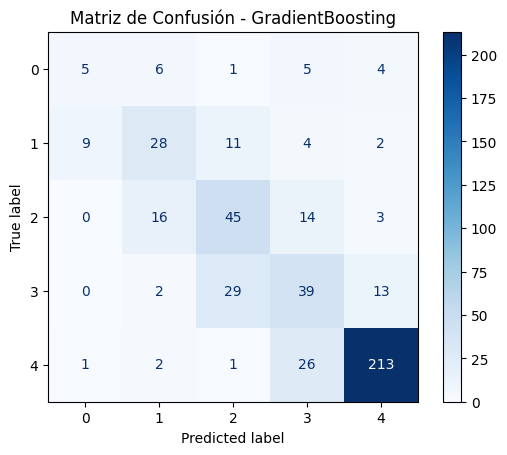

In [ ]:
# Confuion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()

### 10. Conclusions

Despite this being the best model obtained, the conclusions are as follows:
- **Balance Accuracy:**
This metric indicates that the model is not balanced in its ability to predict all classes equally. Although it is the best among the obtained options, a value of 0.5360 suggests that the model is barely above random chance in equitably predicting each class.

- **Classification Report:**
   - Class 0 
        - Precision: 0.33
        - Recall: 0.24
        - F1-score: 0.28

    This class has a low recall, meaning the model fails to correctly identify most cases in this class.
    Additionally, its low precision indicates that when the model predicts this class, it is often incorrect.



    - Class 1
        - Precision: 0.52 
        - Recall: 0.52 
        - F1-score: 0.52

    This class has a balanced performance, but not particularly high.


    - Class 2
        - Precision: 0.52 
        - Recall: 0.58 
        - F1-score: 0.55

        In this case, the recall is better than in the previous class, indicating that the model recognizes this class more frequently. On the other hand, the overall performance is acceptable.


    - Class 3 
        - Precision: 0.44 
        - Recall: 0.47  
        - F1-score: 0.46

        The performance of this class is low, similar to Class 1.



    - Class 4
        - Precision: 0.91
        - Recall: 0.88 
        - F1-score: 0.89

        The model predicts this class well since it has a larger amount of data.

    - Overall Analysis
        - The macro average F1-score of 0.54 indicates that performance is moderate on average but with significant differences between classes.

- **Confusion Matrix:**
    - Classes 0 and 1 have low recall:
    are frequently predicted as other classes, indicating that the model fails to differentiate them well.

    - Class 3 is frequently confused with class 2:
    29 times class 3 was wrongly predicted as class 2.

    - Class 4 is the best predicted, but absorbs other values:
    26 times it was mistaken for class 3.


Despite the efforts made in *gradeclass* classification, the results obtained have not been optimal. The performance metrics suggest that the model fails to differentiate accurately enough between the different categories, which limits its practical applicability.

Given this situation, an alternative strategy has been considered: instead of directly predicting the gradeclass category, it is proposed to reformulate the problem as a binary classification task, determining whether a student will pass or fail based on the same variables. This new approach simplifies the problem and could improve the predictive capability of the model, providing a more effective tool for academic decision making.

The approach followed for this new strategy will be detailed below, along with the results obtained.


## Alternative approach: binary classification

To carry out the analysis, it is necessary to redefine the target variable. To do so, a new column will be created to indicate whether a student has passed or failed. In this approach, those with a *gradeclass* rating between 0 and 3 will be considered as passing, while students with a rating of 4 will be categorized as failing. This transformation will allow the problem to be approached from a binary perspective, facilitating the analysis and construction of the predictive model.

In [ ]:
# Create a column with the new target: 0 for fails, 1 for passes
df_3 = df_2.copy()
df_3['Pass'] = df_3['GradeClass'].apply(lambda x: 0 if x == 4 else 1)

In [91]:
df_3.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Pass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0,1
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0,1
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0,0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0,1
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0,0


In [ ]:
# General information
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2392 entries, 1001 to 3392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
 13  Pass               2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 280.3 KB


In [ ]:
# Checking for null values
df_3.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
Pass                 0
dtype: int64

In [ ]:
# Checking for duplicates
df_3.duplicated().sum()

0

#### 1. Separation into Train and Test

In [95]:
train_set, test_set = train_test_split(df_3, test_size = 0.2, random_state= 42)

### 2. MiniEDA

#### A. Analysis of the New Target

In [96]:
target = 'Pass'
train_set[target].value_counts(True)

Pass
0    0.509148
1    0.490852
Name: proportion, dtype: float64

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\3403399698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=train_set, palette='Set2')


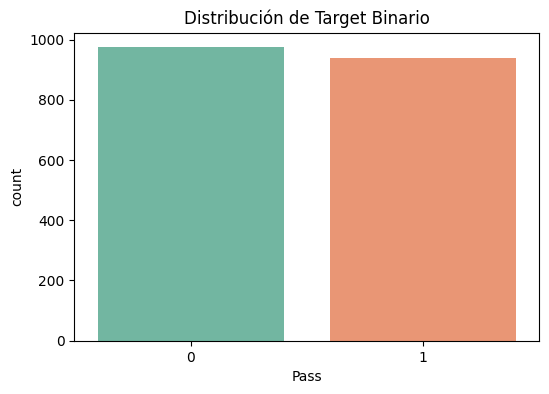

In [97]:
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=train_set, palette='Set2')
plt.title('Distribución de Target Binario')
plt.show();

Although the new target still shows an imbalance in the classes, there is a significant improvement in the results. The distribution of the classes is now much more balanced, with 0.51 for failures and 0.49 for passes, which represents a considerable improvement compared to the original classification. This adjustment has allowed the model to improve its ability to differentiate between the two classes, achieving a much more balanced and promising performance.

#### B. Analysis of Numerical Variables

In [98]:
train_set.groupby(target)[numerical_cols].describe().T

Pass                            0           1
StudyTimeWeekly count  974.000000  939.000000
                mean     9.141075   10.378579
                std      5.645059    5.696920
                min      0.008031    0.018117
                25%      4.407677    5.748010
                50%      8.701423   10.488727
                75%     13.764548   15.024700
                max     19.968425   19.939810
Absences        count  974.000000  939.000000
                mean    20.835729    8.169329
                std      5.365349    5.927069
                min      0.000000    0.000000
                25%     17.000000    3.000000
                50%     21.000000    7.000000
                75%     25.000000   12.000000
                max     29.000000   29.000000

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


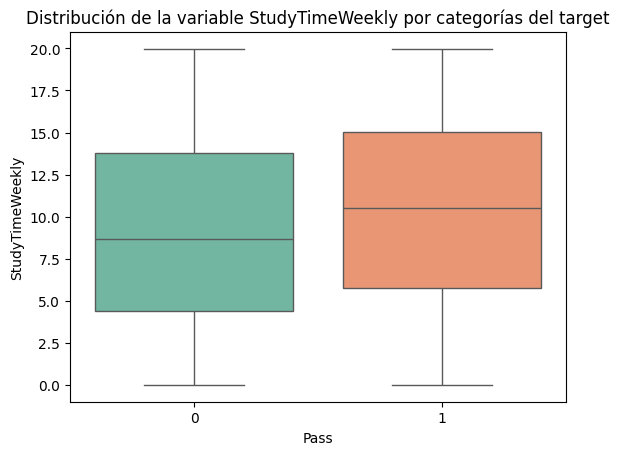

C:\Users\maria\AppData\Local\Temp\ipykernel_16808\581799177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y= col, data=train_set, palette='Set2')


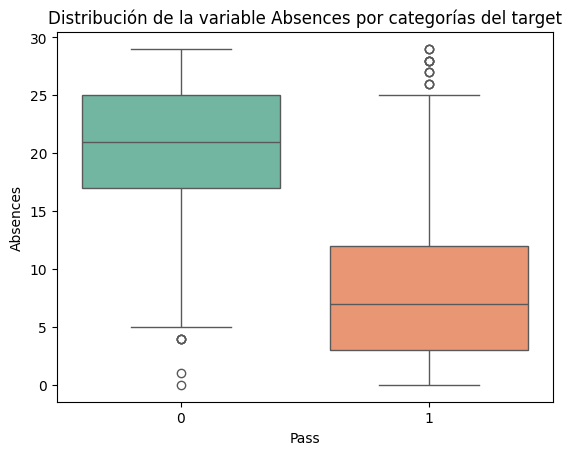

In [99]:
for col in numerical_cols:
    sns.boxplot(x=target, y= col, data=train_set, palette='Set2')
    plt.title(f'Distribución de la variable {col} por categorías del target')
    plt.show();

In [ ]:
# Apply ANOVA for each numerical variable
for col in numerical_cols:  
    groups = [train_set[train_set[target] == category][col] for category in train_set[target].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: StudyTimeWeekly - p-value: 1.965202016422145e-06
Variable: Absences - p-value: 0.0


As when we had the multi-categorical target, both variables are highly correlated with the new target.

#### C. Analysis of Binary Variables

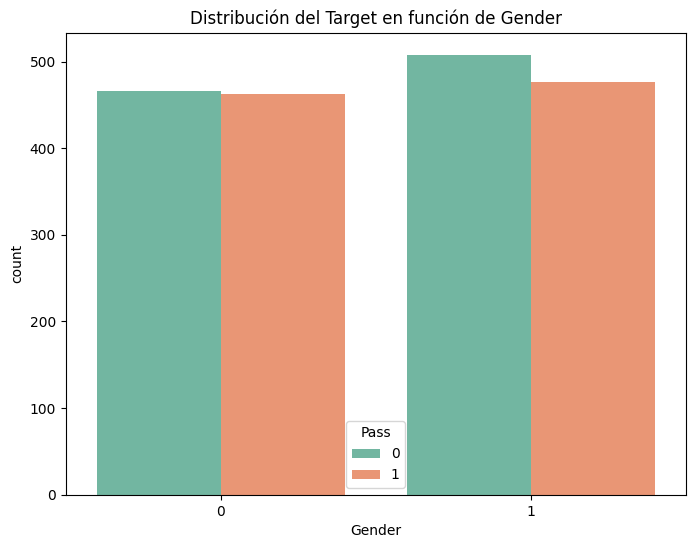

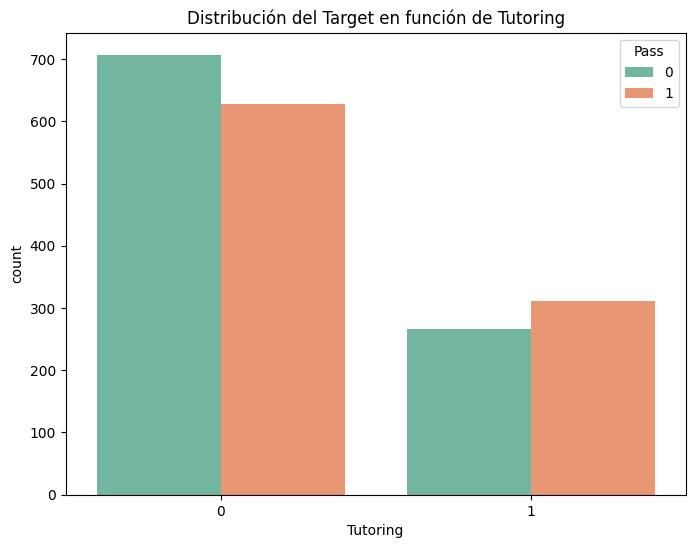

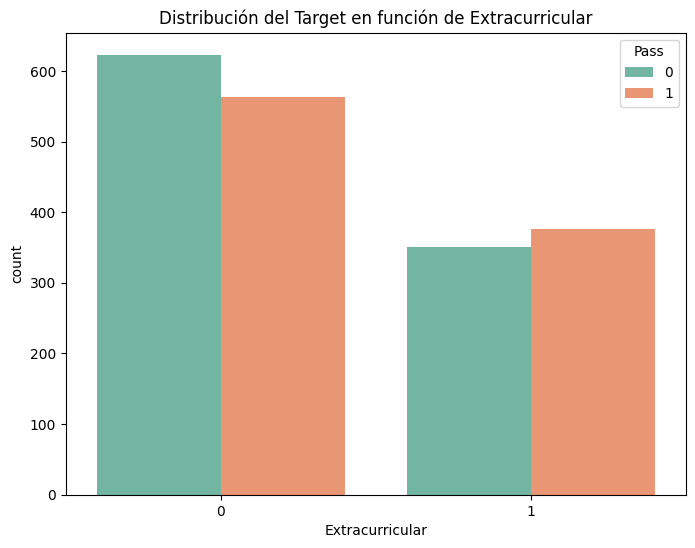

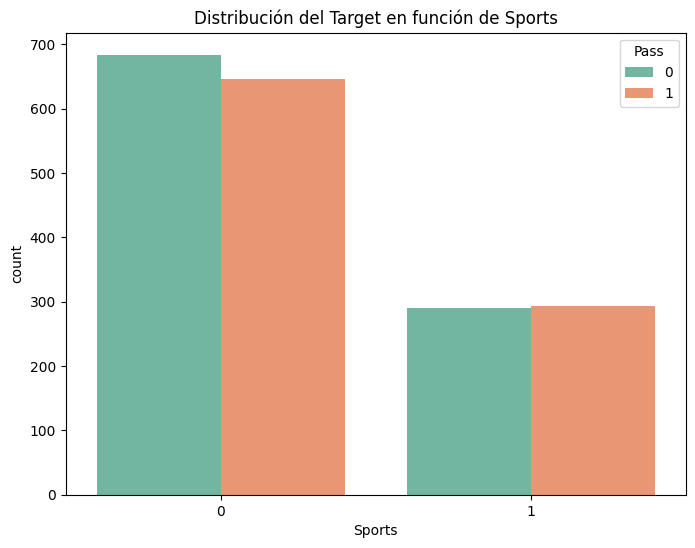

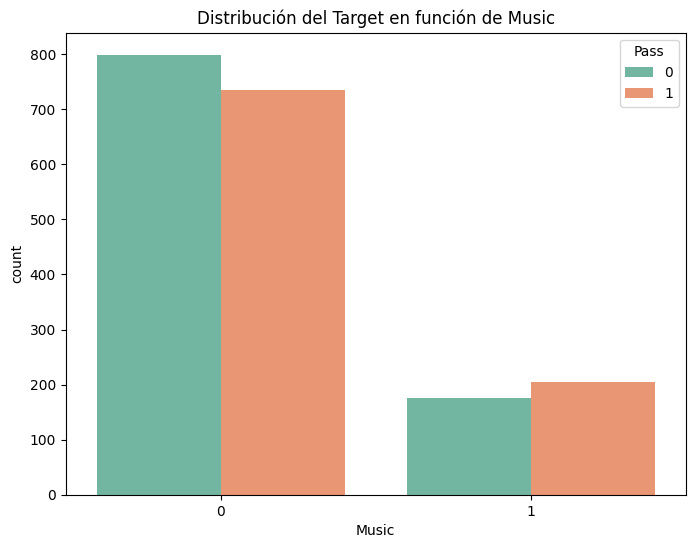

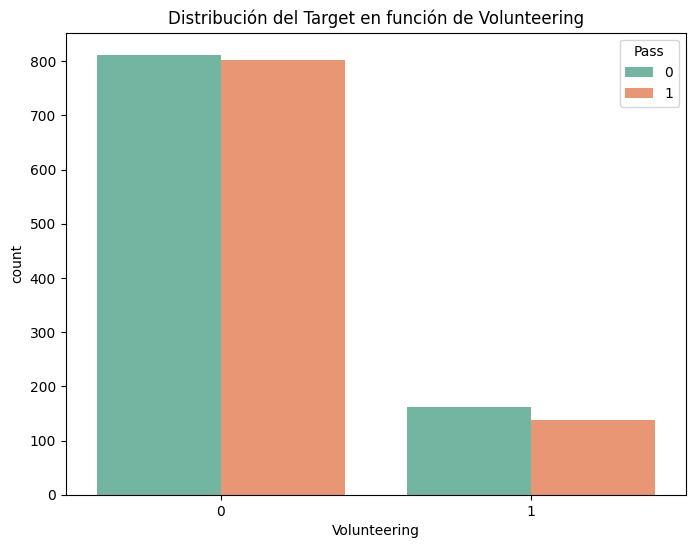

In [101]:
for feature in binary_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue= target, data=train_set, palette='Set2')
    plt.title(f'Distribución del Target en función de {feature}')
    plt.xlabel(feature)

In [ ]:
for col in binary_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Gender - p-value: 0.5520756970936492
Variable: Tutoring - p-value: 0.007630133775902247
Variable: Extracurricular - p-value: 0.07886921155079361
Variable: Sports - p-value: 0.5291823359305924
Variable: Music - p-value: 0.04504526328212113
Variable: Volunteering - p-value: 0.24327929607971258


In this case, the variables *Tutoring* and *Music* show significant relationships with the new objective, while the others do not seem to have a relevant impact on the prediction. It should be noted that, in the previous analysis, Extracurricular had greater relevance, while Music was not significant. This change in the relationships suggests that the binary approach has altered the behavior of some variables.

#### D. Análisis de las variables categóricas

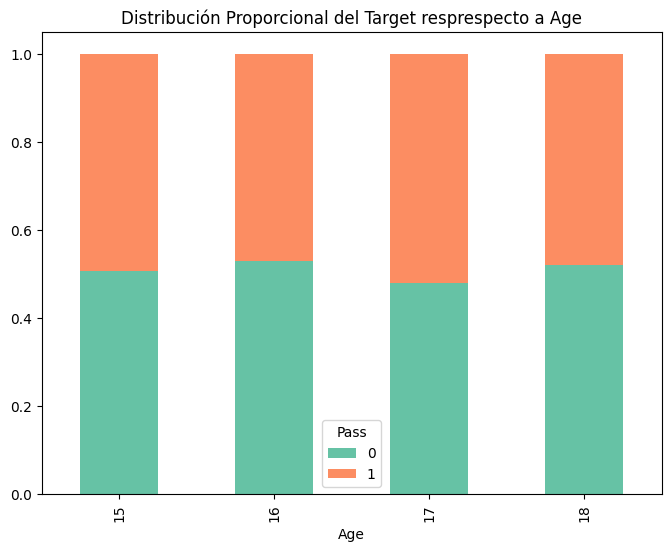

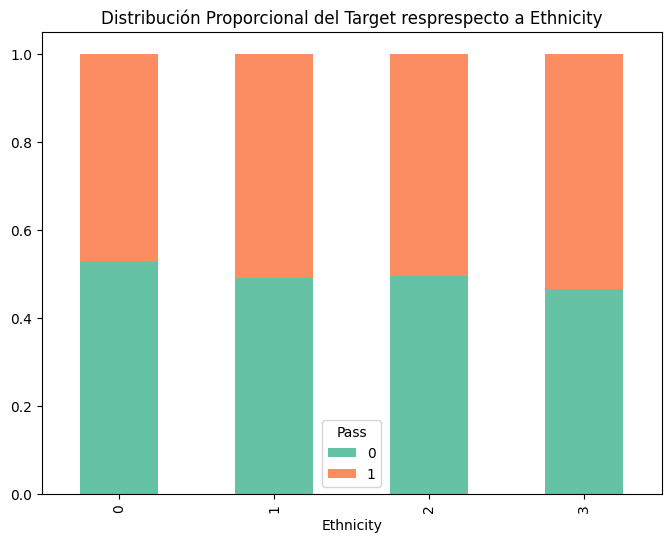

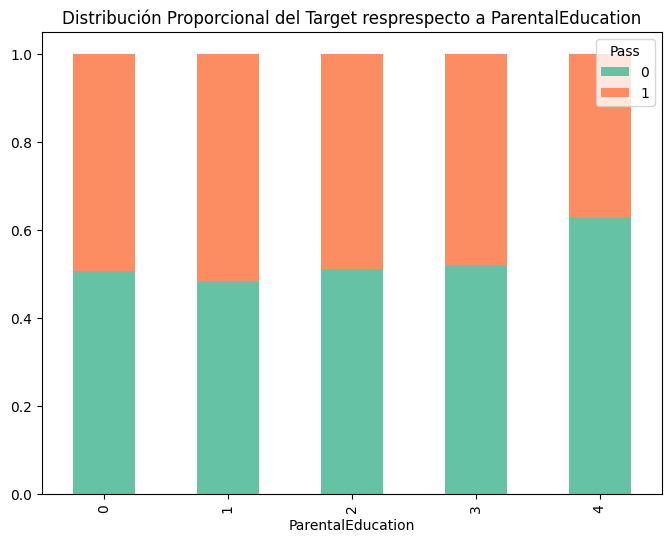

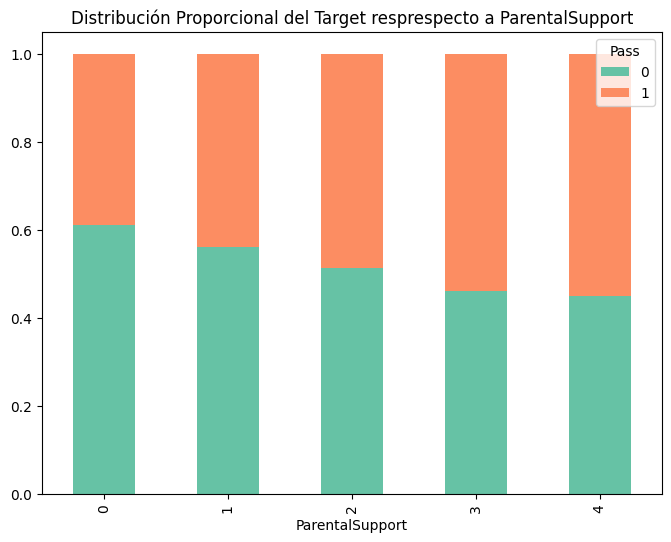

In [ ]:
for col in categorical_cols:

    # Calculate the proportions
    proporciones = train_set.groupby(col)[target].value_counts(normalize=True).unstack().fillna(0)

    # Graph the proportions
    proporciones.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('Set2'))

    plt.title(f'Distribución Proporcional del Target resprespecto a {col}')
    plt.xlabel(col)
    plt.show()

In [104]:
for col in categorical_cols:
    contingency_table = pd.crosstab(train_set[col], train_set[target])  # Tabla de contingencia
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {col} - p-value: {p_value}")

Variable: Age - p-value: 0.41353787285054733
Variable: Ethnicity - p-value: 0.26801263837071476
Variable: ParentalEducation - p-value: 0.1454979461478503
Variable: ParentalSupport - p-value: 0.0007327035596402558


The variable *ParentalSupport* remains highly significant, with an improvement in the comparison of p-values, highlighting its influence on academic performance. The other variables show no significant relationships with the new target, although the relevance of *ParentalEducation* and *Ethnicity* has further decreased in this new analysis.

In [105]:
test_set

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass,Pass
StudentID,,,,,,,,,,,,,,
2005,15,1,2,4,0.135763,17,0,2,0,1,1,1,4.0,0
1197,16,1,0,4,1.989925,0,0,1,1,0,0,1,1.0,1
3343,15,0,0,0,10.588715,15,0,3,0,0,0,1,2.0,1
2709,18,1,1,2,16.208658,1,0,3,1,0,0,0,0.0,1
1436,18,0,0,0,3.576821,27,0,1,0,1,0,0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,18,1,0,2,8.412605,16,0,3,0,1,0,0,4.0,0
1121,18,1,0,3,3.170405,12,1,1,1,1,0,0,3.0,1
1284,17,0,0,1,5.141922,5,1,1,0,0,0,0,3.0,1


In [ ]:
# Standardisation of numeric variables and conversion of the variable ‘Age’ with one-hot-encoder
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), ['Age']),  # OneHotEncoder for categoricals with more than 2 classes
    ("scaler", StandardScaler(), numerical_cols)  # Numerical scaling
], remainder='passthrough')  # Maintains columns that do not require transformation

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Adjust pipeline in training dataset
pipeline.fit(train_set)

# Transform both datasets (without re-adjustment)
array_train_transformed = pipeline.transform(train_set)
array_test_transformed = pipeline.transform(test_set)

# Get column names AFTER training on train
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame with correct column names
train_transformed = pd.DataFrame(array_train_transformed, columns=feature_names)
test_transformed = pd.DataFrame(array_test_transformed, columns=feature_names)

train_transformed.head()

,onehot__Age_15,onehot__Age_16,onehot__Age_17,onehot__Age_18,scaler__StudyTimeWeekly,scaler__Absences,remainder__Gender,remainder__Ethnicity,remainder__ParentalEducation,remainder__Tutoring,remainder__ParentalSupport,remainder__Extracurricular,remainder__Sports,remainder__Music,remainder__Volunteering,remainder__GradeClass,remainder__Pass
0,0.0,0.0,0.0,1.0,1.468159,1.105915,1.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0
1,0.0,1.0,0.0,0.0,-1.276773,0.516509,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
2,0.0,0.0,1.0,0.0,-1.103632,1.223797,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,0.0,0.0,1.0,0.0,1.068117,1.223797,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,1.0,0.0,0.0,-1.526524,0.516509,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0


In [ ]:
# Check that the numerical columns have been standardised correctly
num_cols = ['scaler__StudyTimeWeekly', 'scaler__Absences']
train_transformed[num_cols].describe()

,scaler__StudyTimeWeekly,scaler__Absences
count,1.913000e+03,1.913000e+03
mean,8.821427e-17,-2.228571e-17
std,1.000261e+00,1.000261e+00
min,-1.708474e+00,-1.723237e+00
25%,-8.401381e-01,-8.980672e-01
50%,-4.028255e-02,4.498347e-02
75%,8.171785e-01,8.701528e-01
max,1.792568e+00,1.695322e+00


### 3. Separation into X and Y pairs

In [ ]:
# Exclude GradeClass variable and new target
features = [col for col in train_transformed.columns if col not in ['remainder__GradeClass','remainder__Pass']]
features

['onehot__Age_15',
 'onehot__Age_16',
 'onehot__Age_17',
 'onehot__Age_18',
 'scaler__StudyTimeWeekly',
 'scaler__Absences',
 'remainder__Gender',
 'remainder__Ethnicity',
 'remainder__ParentalEducation',
 'remainder__Tutoring',
 'remainder__ParentalSupport',
 'remainder__Extracurricular',
 'remainder__Sports',
 'remainder__Music',
 'remainder__Volunteering']

In [ ]:
# Split data into x and y
X_train = train_transformed[features]
y_train =train_transformed['remainder__Pass']
X_test = test_transformed[features]
y_test = test_transformed['remainder__Pass']

In [110]:
X_train.head()

,onehot__Age_15,onehot__Age_16,onehot__Age_17,onehot__Age_18,scaler__StudyTimeWeekly,scaler__Absences,remainder__Gender,remainder__Ethnicity,remainder__ParentalEducation,remainder__Tutoring,remainder__ParentalSupport,remainder__Extracurricular,remainder__Sports,remainder__Music,remainder__Volunteering
0,0.0,0.0,0.0,1.0,1.468159,1.105915,1.0,0.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,-1.276773,0.516509,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,-1.103632,1.223797,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.068117,1.223797,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,-1.526524,0.516509,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0


In [111]:
y_train

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1908    0.0
1909    0.0
1910    1.0
1911    0.0
1912    0.0
Name: remainder__Pass, Length: 1913, dtype: float64

### 4. Modelling

In [ ]:
# Defining base models without adjusted hyperparameters
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "LightGBM": lgb.LGBMClassifier(),
     "XGBoost": XGBClassifier()
}

# Evaluating baseline models with Balanced Accuracy
scores = {}

for model_name, model in models.items():
    print(f"Entrenando {model_name}...")

    # Create pipeline for each model without preprocessing, since X_train and X_test are already transformed
    pipeline_model = Pipeline([
        ("model", model)
    ])

    # Train the model
    pipeline_model.fit(X_train, y_train)

    # Predict in test
    y_pred = pipeline_model.predict(X_test)

    # Evaluate using balanced_accuracy
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    scores[model_name] = balanced_acc

    print(f"{model_name} - Balanced Accuracy: {balanced_acc:.4f}")

# Show final results in order
print("\nResultados finales de los modelos:")
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

Entrenando RandomForest...
RandomForest - Balanced Accuracy: 0.8771
Entrenando GradientBoosting...
GradientBoosting - Balanced Accuracy: 0.8980
Entrenando LogisticRegression...
LogisticRegression - Balanced Accuracy: 0.8936
Entrenando LightGBM...
[LightGBM] [Info] Number of positive: 939, number of negative: 974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1913, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490852 -> initscore=-0.036596
[LightGBM] [Info] Start training from score -0.036596
LightGBM - Balanced Accuracy: 0.8918
Entrenando XGBoost...
XGBoost - Balanced Accuracy: 0.8897

Resultados finales de los modelos:
GradientBoosting: 0.8980
LogisticRegression: 0.8936
LightGBM: 0.8918
X

In [ ]:
# Selecting the best model based on balanced_accuracy
best_model_name = max(scores, key=scores.get)  # Model with higher balanced_accuracy
print(f"\n Modelo seleccionado para optimización: {best_model_name}")


 Modelo seleccionado para optimización: GradientBoosting


### 5. Optimisation of the best model

In [ ]:
param_grid = {
    "RandomForest": {"model__n_estimators": [50, 100, 200], "model__max_depth": [None, 10, 20]},
    "GradientBoosting": {"model__n_estimators": [50, 100], "model__learning_rate": [0.01, 0.05, 0.1]},
    "LightGBM": {"model__num_leaves": [31, 50], "model__learning_rate": [0.01, 0.1]},
    "XGBoost": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [3, 6, 10],
        "model__learning_rate": [0.01, 0.1, 0.2],
    }
}

# Optimise hyperparameters in the best model
print(f"\n Buscando mejores hiperparámetros para {best_model_name}...")

pipeline = Pipeline([
    ("model", models[best_model_name])  # Only the best model
])

grid_search = GridSearchCV(pipeline, param_grid[best_model_name], cv=5, scoring="balanced_accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


 Buscando mejores hiperparámetros para GradientBoosting...


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__n_estimators': [50, 100]},
             scoring='balanced_accuracy')

### 6. Evaluation against test

In [ ]:
# Evaluate in test
y_pred = grid_search.best_estimator_.predict(X_test)
best_score = balanced_accuracy_score(y_test, y_pred)

print(f"\n {best_model_name} - Mejor Balanced Accuracy después de ajuste: {best_score:.4f}")

# Saving the best model
best_model = grid_search.best_estimator_


 GradientBoosting - Mejor Balanced Accuracy después de ajuste: 0.9063


### 7. Guardado del mejor modelo

In [ ]:
# Create the ‘models’ folder
model_path = "../models/best_model_bin.pkl"
#os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the best model in the models folder
joblib.dump(best_model, model_path)

print("El modelo ha sido guardado correctamente")

El modelo ha sido guardado correctamente


### 8. Analysis of results

In [117]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91       237
         1.0       0.93      0.88      0.90       242

    accuracy                           0.91       479
   macro avg       0.91      0.91      0.91       479
weighted avg       0.91      0.91      0.91       479



#### Conclusions
With the switch to the new binary target, the performance of the Gradient Boosting model has shown a significant improvement compared to the previous multi-class classification approach.

- **Improvement in key metrics:**

    Accuracy, recall and f1-score for both classes have been significantly increased. In the new model, an f1-score of 0.91 is observed for both classes, indicating a good balance between precision and recall.

    Precision and recall for class 0 are 0.88 and 0.93, respectively, while for class 1 they are 0.93 and 0.88. This shows that the model is able to predict both pass and fail with high accuracy.

- **Balance between classes:**
    The model has achieved an accuracy balance of 0.9063, suggesting that the predictions between the two classes are much more balanced compared to the previous model. In the previous model, the class imbalance was much more evident, making it difficult to predict minority classes and reducing the overall effectiveness of the model.

- **Overall accuracy:**
    The overall accuracy of the model is 0.91, reflecting a marked improvement over the accuracy of 0.69 obtained with the previous model, where predictions were affected by significant imbalance between classes. This increase in accuracy highlights the effectiveness of the binary approach compared to multiclass classification.

- **Performance metrics in comparison:**
    In the case of the model with the previous target, the accuracy and recall metrics for the classes were significantly lower, especially in classes 0, 1, and 2, where the model had difficulties in making accurate predictions. The current model, with the binary target, shows a marked improvement in these aspects, especially in the f1-score which now exceeds 0.9 in both classes.

- **Impact on the overall analysis:**
    The transition to a binary target has not only balanced the performance of the model, but has simplified the prediction task, resulting in a much more robust and efficient model in terms of accuracy and recall. This makes the model more useful in practice, as the predictions are much more reliable and consistent in both groups (pass and fail).

In summary, the switch to the binary approach has significantly improved the model's performance metrics, making it a more effective tool for predicting student performance. The transition has been especially beneficial for the model's ability to handle unbalanced classes, achieving a more equitable distribution of predictions across classes.

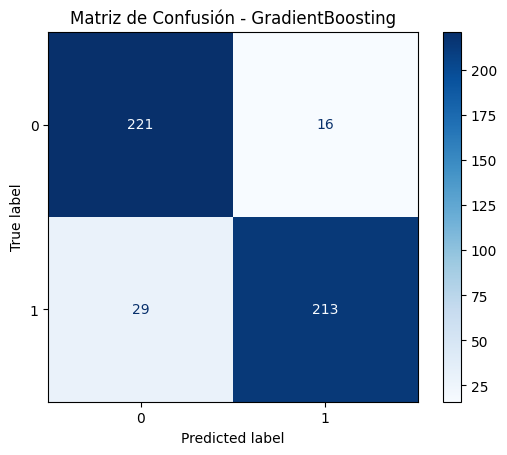

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()

#### Conclusions of the confusion matrix
- Class 0:

    - Old model: Only 5 cases well classified, with many prediction errors (6 times predicted as class 1, 5 times as class 3).

    - New model: 221 cases well classified as failed, with only 16 errors (incorrect predictions as passed).

Improvement: In the binary model, the number of cases correctly classified for class 0 has increased considerably, and errors are minimal (16 incorrect predictions). This shows a marked improvement in the model's ability to correctly predict failed students.

- Class 1:

    - Old model: 28 cases well classified, but many errors (11 times predicted as class 2, 9 times as class 0).

    - New model: 213 cases well classified as passing, with 29 errors (incorrect predictions as failing).

Improvement: Although errors increase compared to class 0, the binary model is still quite accurate in predicting passes. In the previous model, the number of errors was considerably higher and more diverse, as more classes were involved, making predictions more difficult.

**Error reduction:**

In the previous model, errors were more diverse and affected several classes. For example, in class 0, there were incorrect predictions for classes 1, 3 and 4. In the binary model, the errors are mainly limited to predicting class 0 as class 1, indicating that the binary model has a clearer and more accurate approach, with less confusion between classes.

In the previous model, classes 2 and 3 also suffered from many errors, while in the binary model, the errors are much smaller and more focused.

**Confusion in classes:**

The previous model had high confusion between classes due to the multi-class nature. For example, class 0 was confused with class 1 and 3, class 1 with class 2, and so on.

In the binary model, although there are some prediction errors between pass and fail, the overall confusion between classes is much less, resulting in a more efficient classification.


**Summary:**
- The transition from the multi-class model to the binary model has considerably improved its performance.

- Prediction errors have decreased significantly, and the remaining errors are more concentrated in predicting passes as fails (or vice versa), showing that the model now has a clearer focus.

- Higher accuracy and recall: the binary model has achieved a much higher f1-score, with higher accuracy in classifying both classes (pass and fail), confirming that the switch to the binary target has optimized the model's performance.

In summary, the binary model is much more effective and balanced compared to the multiclass model, achieving higher accuracy and reducing classification errors significantly.